In [1]:
import sys
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../')
from utils.features import talib_features

In [2]:
par = 'EURUSD'
df = pd.read_csv(f'../candles/{par}_M1.csv').sort_values('from')

In [3]:
df

,from,open,max,min,close,volume,at,to
0,1679249700,1.06841,1.06841,1.06841,1.06841,1,1679249700000,1679249700
1,1679249760,1.06892,1.06892,1.06892,1.06892,1,1679249760000,1679249760
2,1679249940,1.06926,1.06926,1.06926,1.06926,1,1679249940000,1679249940
3,1679250000,1.06921,1.06921,1.06921,1.06921,1,1679250000000,1679250000
4,1679250060,1.06926,1.06926,1.06921,1.06921,2,1679250060000,1679250060
...,...,...,...,...,...,...,...,...
751802,1742255820,1.09184,1.09190,1.09170,1.09179,22,1742255820000,1742255820
750363,1742255880,1.09179,1.09182,1.09170,1.09182,18,1742255880000,1742255880
751803,1742255880,1.09179,1.09182,1.09170,1.09182,18,1742255880000,1742255880
750364,1742255940,1.09181,1.09182,1.09170,1.09178,21,1742255940000,1742255940


In [4]:
import plotly.graph_objects as go

df_plot = df[-500:]
df_plot['from'] = pd.to_datetime(df_plot['from'], unit='s')
fig = go.Figure(data=[go.Candlestick(x=df_plot['from'],
                open=df_plot['open'],
                high=df_plot['max'],
                low=df_plot['min'],
                close=df_plot['close'])
                ])
fig.show()

/var/folders/_v/kmc13qk97rs_tg7g815jf78m0000gn/T/ipykernel_49999/1027148603.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['from'] = pd.to_datetime(df_plot['from'], unit='s')


In [6]:
import plotly.graph_objects as go

df_plot = df[:2000]  # Last 500 candles
df_plot['from'] = pd.to_datetime(df_plot['from'], unit='s')

# Create the candlestick chart with improved styling
fig = go.Figure(data=[
    go.Candlestick(
        x=df_plot['from'],
        open=df_plot['open'],
        high=df_plot['max'],
        low=df_plot['min'],
        close=df_plot['close'],
        increasing_line_color='#26A69A',  # Nice green color
        decreasing_line_color='#EF5350',  # Nice red color
        name='OHLC'
    ),
])

# Add volume as a bar chart at the bottom
fig.add_trace(
    go.Bar(
        x=df_plot['from'],
        y=df_plot['volume'],
        name='Volume',
        marker_color='rgba(128,128,128,0.5)',
        yaxis='y2'
    )
)

# Update the layout with better styling
fig.update_layout(
    title='EURUSD 1M OHLC Chart',
    yaxis_title='Price',
    yaxis2=dict(
        title='Volume',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    xaxis_title='Date',
    template='plotly_white',  # Clean white template
    hovermode='x unified',    # Show all data points at the same x-coordinate
    legend=dict(
        orientation="h",      # Horizontal legend
        yanchor="bottom",    
        y=1.02,              # Position above the chart
        xanchor="right",
        x=1
    ),
    # Add margins for better spacing
    margin=dict(l=50, r=50, t=50, b=50)
)

# Update y-axes ranges for better visualization
fig.update_yaxes(
    gridcolor='rgba(128,128,128,0.2)',
    zerolinecolor='rgba(128,128,128,0.5)'
)

# Update x-axis for better date display
fig.update_xaxes(
    rangeslider_visible=True,  # Add a range slider at the bottom
    rangebreaks=[
        dict(bounds=["sat", "mon"]),  # Hide weekends
    ],
    gridcolor='rgba(128,128,128,0.2)',
    showgrid=True
)

fig.show()

/var/folders/_v/kmc13qk97rs_tg7g815jf78m0000gn/T/ipykernel_52197/992347620.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
df_features = talib_features(df)

In [24]:
df_features

,from,open,max,min,close,volume,at,to,std,HourOfDay,...,Ewm200,Ewm100,Ewm50,Ewm10,Ewm5,diff_vela,avg_candle,diff,x,Y
date,,,,,,,,,,,,,,,,,,,,,
2022-12-19 05:01:00+00:00,1671426060,1.06077,1.06080,1.06050,1.06050,137,1671426060000,1671426060,0.000182,5,...,0.092875,3.910583,9.077981,3.513749,2.456531,-0.00027,0.000074,-0.00000,-4.884451,-1.0
2022-12-19 05:02:00+00:00,1671426120,1.06063,1.06072,1.06050,1.06050,87,1671426120000,1671426120,0.000183,5,...,0.092609,3.818816,9.256257,2.289185,1.309321,-0.00013,0.000074,0.00005,-2.341884,-1.0
2022-12-19 05:03:00+00:00,1671426180,1.06070,1.06075,1.06050,1.06055,89,1671426180000,1671426180,0.000182,5,...,-0.065713,2.751584,7.131346,1.058903,0.280320,-0.00015,0.000075,-0.00013,-2.680147,-1.0
2022-12-19 05:04:00+00:00,1671426240,1.06056,1.06070,1.06030,1.06042,117,1671426240000,1671426240,0.000183,5,...,0.348548,5.251040,12.935275,2.310451,1.738339,-0.00014,0.000076,0.00001,-2.484839,1.0
2022-12-19 05:05:00+00:00,1671426300,1.06036,1.06043,1.06020,1.06043,87,1671426300000,1671426300,0.000185,5,...,0.315662,4.954524,11.944722,1.693118,1.194684,0.00007,0.000076,0.00002,1.246520,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-13 17:46:00+00:00,1734111960,1.04975,1.04976,1.04948,1.04961,71,1734111960000,1734111960,0.000436,17,...,-0.904312,-0.008248,1.655967,4.266530,1.314731,-0.00014,0.000147,-0.00010,-1.241968,-1.0
2024-12-13 17:47:00+00:00,1734112020,1.04960,1.04970,1.04940,1.04951,113,1734112020000,1734112020,0.000433,17,...,-0.257074,0.395456,2.332940,3.206461,1.245124,-0.00009,0.000145,0.00010,-0.807140,1.0
2024-12-13 17:50:00+00:00,1734112200,1.04959,1.04962,1.04959,1.04961,6,1734112200000,1734112200,0.000429,17,...,-0.916337,-0.015868,1.431953,1.518132,0.486370,0.00002,0.000145,-0.00010,0.179190,-1.0


<Axes: >

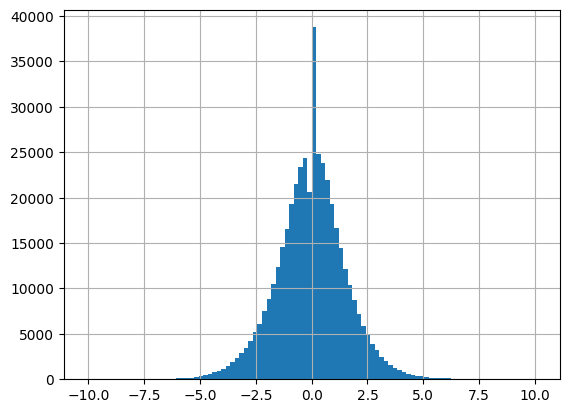

In [25]:
df_features["x"].hist(bins=100)

In [26]:
df.describe()

,from,open,max,min,close,volume,at,to,std,HourOfDay,...,Ewm200,Ewm100,Ewm50,Ewm10,Ewm5,diff_vela,avg_candle,diff,x,Y
count,7.513200e+05,751320.000000,751320.000000,751320.000000,751320.000000,751320.000000,7.513200e+05,7.513200e+05,751221.000000,751320.000000,...,750922.000000,751122.000000,751222.000000,751302.000000,751312.000000,751320.000000,751221.000000,7.513200e+05,751221.000000,705716.000000
mean,1.702648e+09,1.082401,1.082508,1.082213,1.082399,113.217495,1.702648e+12,1.702648e+09,0.000389,11.463302,...,-0.047366,-0.050374,-0.053481,-0.013940,-0.008358,-0.000002,0.000092,-1.179258e-08,-0.041535,-0.014082
std,1.818444e+07,0.016255,0.016253,0.016259,0.016255,64.405732,1.818444e+10,1.818444e+07,0.000343,6.911591,...,4.362109,4.192585,4.056649,3.012127,2.030738,0.000141,0.000041,1.501026e-04,1.518535,0.999902
min,1.671237e+09,1.033880,1.035760,1.033150,1.034010,1.000000,1.671237e+12,1.671237e+09,0.000037,0.000000,...,-206.596576,-188.331848,-121.119516,-18.347596,-5.653560,-0.010000,0.000020,-1.819000e-02,-10.096892,-1.000000
25%,1.686810e+09,1.071310,1.071410,1.071100,1.071310,67.000000,1.686810e+12,1.686810e+09,0.000190,5.000000,...,-1.850285,-1.905702,-1.907598,-1.688451,-1.390082,-0.000070,0.000065,-6.000000e-05,-0.871950,-1.000000
50%,1.702489e+09,1.083530,1.083620,1.083300,1.083530,105.000000,1.702489e+12,1.702489e+09,0.000293,11.000000,...,-0.085345,-0.089920,-0.075036,-0.080344,-0.081115,0.000000,0.000082,-0.000000e+00,0.000000,-1.000000
75%,1.718355e+09,1.092820,1.092910,1.092600,1.092820,150.000000,1.718355e+12,1.718355e+09,0.000471,17.000000,...,1.727139,1.774846,1.781575,1.594740,1.361757,0.000060,0.000107,6.000000e-05,0.800584,1.000000
max,1.734307e+09,1.127520,1.127570,1.127260,1.127520,467.000000,1.734307e+12,1.734307e+09,0.008021,23.000000,...,112.328704,305.471816,128.807335,19.042353,5.656275,0.005220,0.000610,1.000000e-02,10.092435,1.000000


Text(0.5, 0, 'Month')

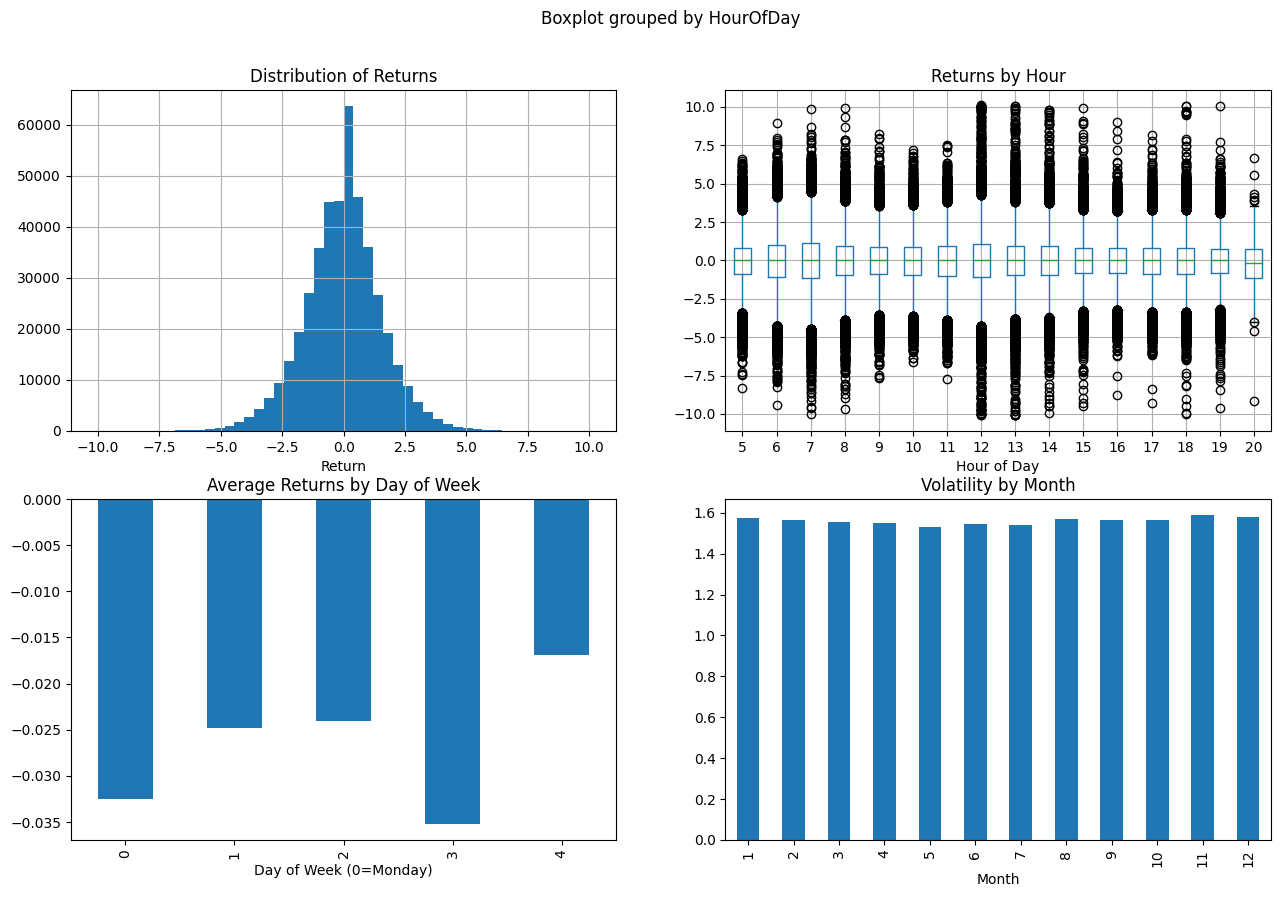

In [28]:
# Basic statistics and distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of returns
df_features['x'].hist(bins=50, ax=axes[0,0])
axes[0,0].set_title('Distribution of Returns')
axes[0,0].set_xlabel('Return')

# Box plot of returns by hour
df_features.boxplot('x', by='HourOfDay', ax=axes[0,1])
axes[0,1].set_title('Returns by Hour')
axes[0,1].set_xlabel('Hour of Day')

# Average returns by day of week
avg_returns = df_features.groupby('DayOfWeek')['x'].mean()
avg_returns.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average Returns by Day of Week')
axes[1,0].set_xlabel('Day of Week (0=Monday)')

# Volatility (std) by month
monthly_vol = df_features.groupby('Month')['x'].std()
monthly_vol.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Volatility by Month')
axes[1,1].set_xlabel('Month')

<Figure size 640x480 with 0 Axes>

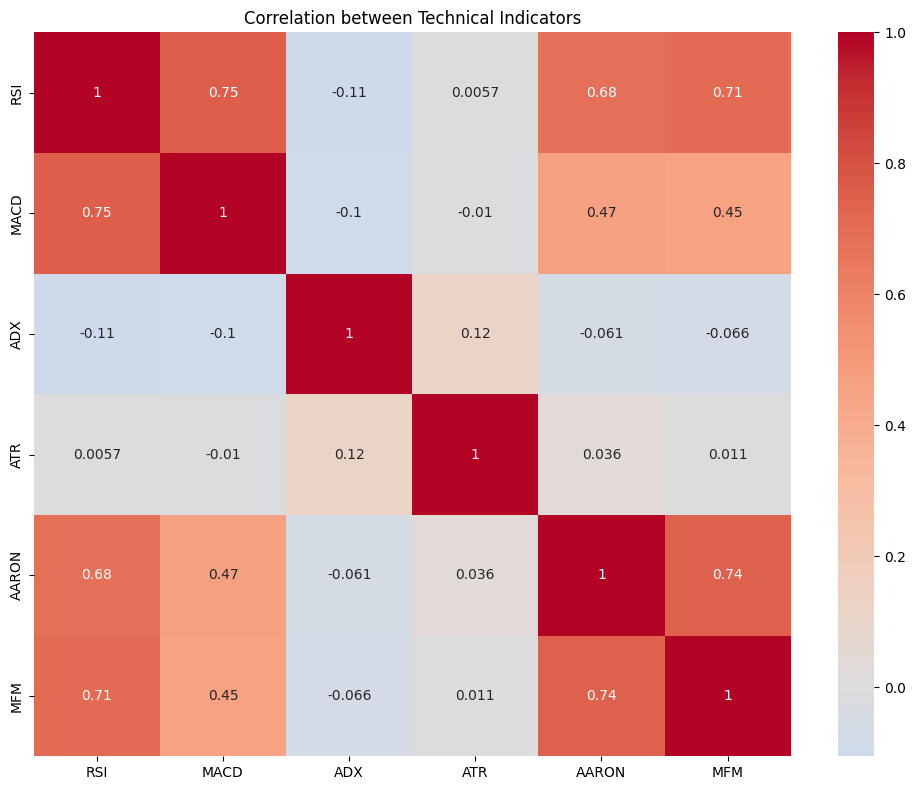

In [29]:


plt.tight_layout()

# Technical indicators correlation analysis
tech_indicators = ['RSI', 'MACD', 'ADX', 'ATR', 'AARON', 'MFM']
correlation_matrix = df_features[tech_indicators].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Technical Indicators')
plt.tight_layout()



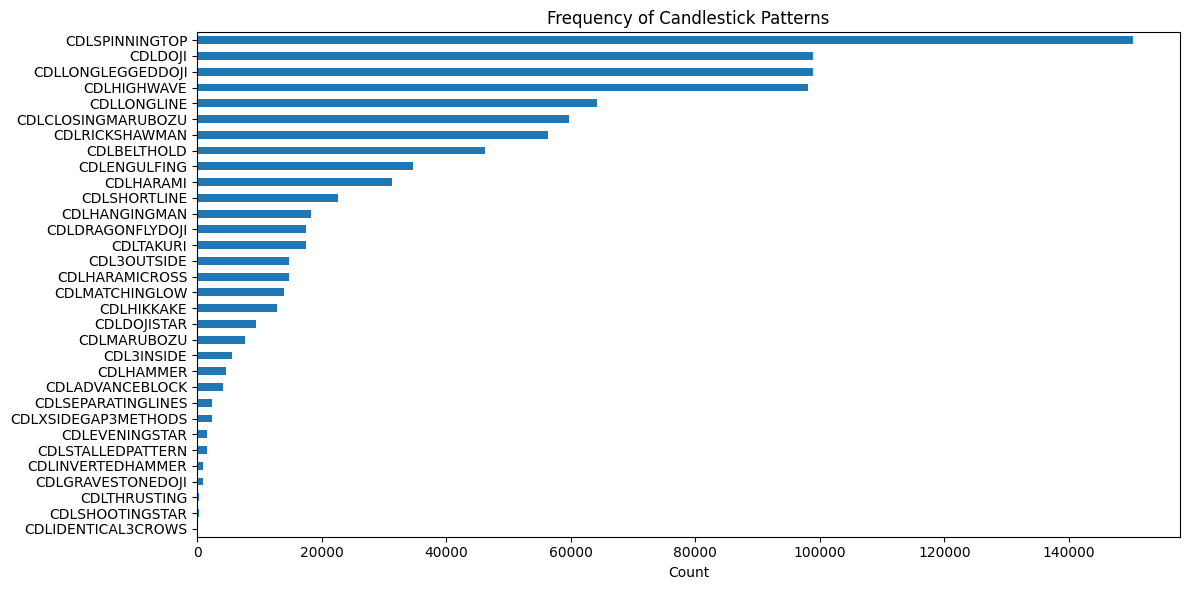

In [30]:

# Pattern recognition analysis
pattern_columns = [col for col in df_features.columns if col.startswith('CDL')]
pattern_counts = df_features[pattern_columns].astype(bool).sum()
pattern_counts = pattern_counts[pattern_counts > 0].sort_values(ascending=True)

plt.figure(figsize=(12, 6))
pattern_counts.plot(kind='barh')
plt.title('Frequency of Candlestick Patterns')
plt.xlabel('Count')
plt.tight_layout()


<Figure size 1500x600 with 0 Axes>

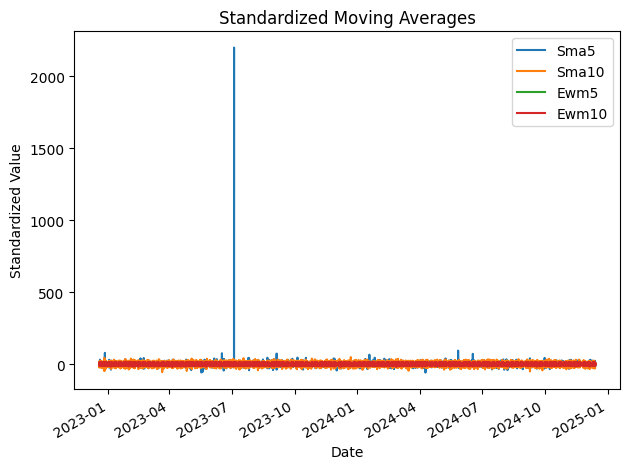

In [31]:
# Moving averages visualization
plt.figure(figsize=(15, 6))
df_features[['Sma5', 'Sma10', 'Ewm5', 'Ewm10']].plot()
plt.title('Standardized Moving Averages')
plt.xlabel('Date')
plt.ylabel('Standardized Value')
plt.legend()
plt.tight_layout()





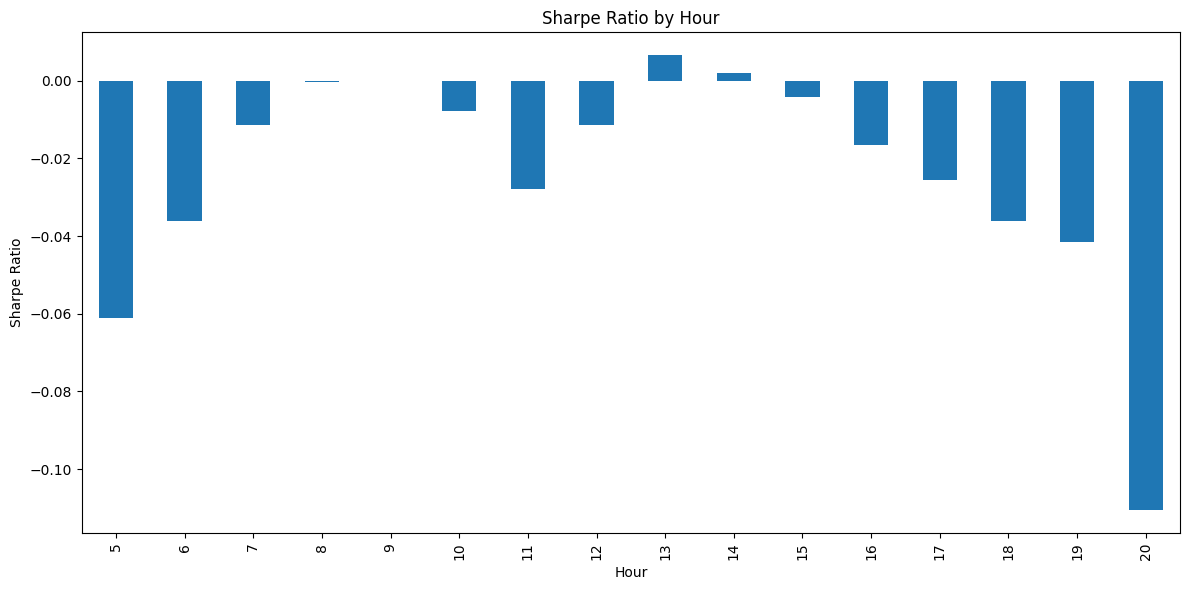

In [32]:
# Trading session analysis
df_features['Hour'] = df_features.index.hour
session_returns = df_features.groupby('Hour')['x'].agg(['mean', 'std'])
session_returns['sharpe'] = session_returns['mean'] / session_returns['std']
plt.figure(figsize=(12, 6))
session_returns['sharpe'].plot(kind='bar')
plt.title('Sharpe Ratio by Hour')
plt.xlabel('Hour')
plt.ylabel('Sharpe Ratio')
plt.tight_layout()